# Tidy Tuesday Subway Challenge 1/5/21 

This week's Tidy Tuesday challenge is focused on the cost of subway lines, with information collected from Subways around the world. This was part of a larger case study on the [Boston Green Line](https://transitcosts.com/city/boston-case-the-story-of-the-green-line-extension/) done by NYU to analyze costs of subway expansion. Subway expansion is less common than other transportation construction project alternatives (like road building, highway repair etc), so it can tend to be more costly. This data is meant to be explored in order to find trends in costs and ultimately increase efficiency in subway construction. 

After exploring the data a bit, I thought it would be interesting to practice my pandas aggregation skills on this dataset and analyze the construction costs of subways across the world. To do this, they have adjusted all costs to USD in their real cost column. This information has not been adjusted for inflation. 

In [24]:
import pandas as pd 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Get DataSet From TidyTuesday

In [2]:

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-05/transit_cost.csv'

In [3]:
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df.head()

,e,country,city,line,start_year,end_year,rr,length,tunnel_per,tunnel,stations,source1,cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
0,7136.0,CA,Vancouver,Broadway,2020,2025,0.0,5.7,87.72%,5.0,6.0,Plan,2830.0,CAD,2018.0,0.84,2377.2,417.052632,Media,https://www.translink.ca/Plans-and-Projects/Ra...
1,7137.0,CA,Toronto,Vaughan,2009,2017,0.0,8.6,100.00%,8.6,6.0,Media,3200.0,CAD,2013.0,0.81,2592,301.395349,Media,https://www.thestar.com/news/gta/transportatio...
2,7138.0,CA,Toronto,Scarborough,2020,2030,0.0,7.8,100.00%,7.8,3.0,Wiki,5500.0,CAD,2018.0,0.84,4620,592.307692,Media,https://urbantoronto.ca/news/2020/03/metrolinx...
3,7139.0,CA,Toronto,Ontario,2020,2030,0.0,15.5,57.00%,8.8,15.0,Plan,8573.0,CAD,2019.0,0.84,7201.32,464.601290,Plan,https://metrolinx.files.wordpress.com/2019/07/...
4,7144.0,CA,Toronto,Yonge to Richmond Hill,2020,2030,0.0,7.4,100.00%,7.4,6.0,Plan,5600.0,CAD,2020.0,0.84,4704,635.675676,Media,https://www.thestar.com/news/gta/2020/06/24/me...


In [5]:
df['country'].nunique()

56

In [6]:
df.isnull().sum()

e                    7
country              7
city                 7
line                 7
start_year          53
end_year            71
rr                   8
length               5
tunnel_per          32
tunnel              32
stations            15
source1             12
cost                 7
currency             7
year                 7
ppp_rate             9
real_cost            0
cost_km_millions     2
source2             10
reference           19
dtype: int64

In [7]:
df[df.country.isnull()].head()

,e,country,city,line,start_year,end_year,rr,length,tunnel_per,tunnel,stations,source1,cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12256.983000,NaN,7790.7826,NaN,NaN,NaN,NaN,NaN,NaN,AVG,233.079919,372.9278706,NaN
538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7660.614375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MEDIAN,180.702862,289.1245783,NaN
539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,STD,258.744889,NaN,NaN
540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MIN,7.789626,NaN,NaN
541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,QUARTILE 1,134.863267,215.7812275,NaN


Null Countries do not provide any reasonable information 

In [8]:
new = df[df.country.notnull()]

In [9]:
new.isnull().sum()

e                    0
country              0
city                 0
line                 0
start_year          46
end_year            64
rr                   1
length               0
tunnel_per          25
tunnel              26
stations             8
source1              5
cost                 0
currency             0
year                 0
ppp_rate             2
real_cost            0
cost_km_millions     2
source2              7
reference           12
dtype: int64

There are still a lot of null start and end years. After looking at the data, these seem to be projected information. So either the line is not done yet and it has started being built, or the line has not been started but the project has a projected end date. We can remove this information because it doesn't really help us gather information about the time and cost of actually buildiing lines. These are just projections. In the future, we could find a way to add this information. 

In [10]:
list = df[df.start_year.isnull()]

In [11]:
list.head()

,e,country,city,line,start_year,end_year,rr,length,tunnel_per,tunnel,stations,source1,cost,currency,year,ppp_rate,real_cost,cost_km_millions,source2,reference
119,7376.0,IR,Tehran,Line 6,NaN,2020,0.0,31.00,100.00%,31.00,29.0,Media,90000000.0,IRR,2017.0,0.000064,5760,185.806452,Media,https://financialtribune.com/articles/auto/786...
120,7377.0,IR,Tehran,Line 7,NaN,2019,0.0,27.00,100.00%,27.00,25.0,Media,90000000.0,IRR,2017.0,0.000064,5760,213.333333,Media,https://financialtribune.com/articles/auto/786...
204,7545.0,IN,Nagpur,Phase 2,NaN,NaN,0.0,43.80,0.00%,0.00,32.0,Plan,112160.0,INR,2018.0,0.048000,5383.68,122.915069,Media,https://timesofindia.indiatimes.com/city/nagpu...
271,7712.0,CN,Shenzhen,Line 3 Phase 4,NaN,2022,0.0,9.35,79.36%,7.42,7.0,Plan,10785.0,CNY,2020.0,0.238200,2568.99,274.760000,Plan,https://www.ndrc.gov.cn/xxgk/zcfb/ghwb/201707/...
277,7722.0,CN,Shenzhen,Line 8 Phase 3,NaN,2025,0.0,4.26,100.00%,4.26,NaN,Plan,8318.0,CNY,2020.0,0.238200,1981.35,465.110000,Plan,https://www.ndrc.gov.cn/xxgk/zcfb/ghwb/201707/...


In [12]:
new = new[new.start_year.notnull()] #look up better way in final go through
new = new[new.end_year.notnull()]

In [13]:
new.isnull().sum()

e                    0
country              0
city                 0
line                 0
start_year           0
end_year             0
rr                   0
length               0
tunnel_per          20
tunnel              21
stations             5
source1              4
cost                 0
currency             0
year                 0
ppp_rate             2
real_cost            0
cost_km_millions     2
source2              5
reference           11
dtype: int64

Next, we are going to decide some columns to drop. Looking at the column information, the different sources were meant to list out where the data creators got each bit of information from. In this project, we are going to assume all sources are credible and can therefore remove that information. I am also going to remove all null values and focus on a limited number of coluns. I may change this in a later iteration. 

In [14]:
final_df = new.dropna()

In [15]:
final_df = final_df[['e','country','city','line','start_year','end_year','rr','length','tunnel_per','tunnel','stations','cost','currency','year','real_cost','cost_km_millions']]

In [16]:
final_df.head()

,e,country,city,line,start_year,end_year,rr,length,tunnel_per,tunnel,stations,cost,currency,year,real_cost,cost_km_millions
0,7136.0,CA,Vancouver,Broadway,2020,2025,0.0,5.7,87.72%,5.0,6.0,2830.0,CAD,2018.0,2377.2,417.052632
1,7137.0,CA,Toronto,Vaughan,2009,2017,0.0,8.6,100.00%,8.6,6.0,3200.0,CAD,2013.0,2592,301.395349
2,7138.0,CA,Toronto,Scarborough,2020,2030,0.0,7.8,100.00%,7.8,3.0,5500.0,CAD,2018.0,4620,592.307692
3,7139.0,CA,Toronto,Ontario,2020,2030,0.0,15.5,57.00%,8.8,15.0,8573.0,CAD,2019.0,7201.32,464.601290
4,7144.0,CA,Toronto,Yonge to Richmond Hill,2020,2030,0.0,7.4,100.00%,7.4,6.0,5600.0,CAD,2020.0,4704,635.675676


## Starter Visuals

I am going to make some basic starter aggregation visuals through pandas aggregation to see what path I want to explore for my final visualizations. 

In [17]:
# Quick look into how group by works 
grouped = final_df.groupby('city')

In [18]:
grouped.get_group('New York')

,e,country,city,line,start_year,end_year,rr,length,tunnel_per,tunnel,stations,cost,currency,year,real_cost,cost_km_millions
135,7408.0,US,New York,7 extension,2007,2014,0.0,1.6,100.00%,1.6,1.0,2400.0,USD,2011.0,2400,1500.000000
136,7409.0,US,New York,Second Avenue Phase 1,2007,2016,0.0,2.7,100.00%,2.7,3.0,4450.0,USD,2012.0,4450,1648.148148
137,7410.0,US,New York,Second Avenue Phase 2,2019,2029,0.0,2.6,100.00%,2.6,3.0,6390.0,USD,2024.0,6390,2457.692308
138,7411.0,US,New York,East Side Access,2007,2022,1.0,2.8,100.00%,2.8,1.0,11000.0,USD,2015.0,11000,3928.571429
139,7416.0,US,New York,Gateway,2019,2026,1.0,5.3,100.00%,5.3,0.0,9500.0,USD,2023.0,9500,1792.452830


In [28]:
# US Cities

us_df = final_df[final_df['country']=='US']

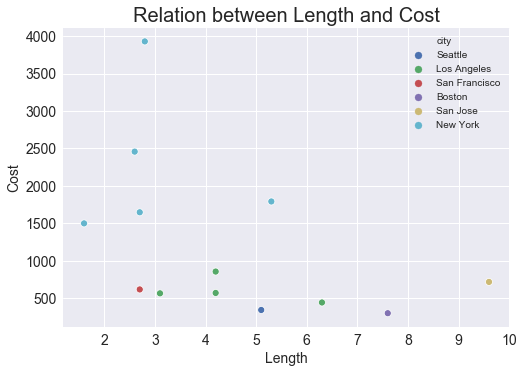

In [30]:
# First Analyze Length of vs cost km_millions 
import seaborn as sns
# scatter plot
ax = sns.scatterplot(x='length', y='cost_km_millions', data=us_df, s=50, hue = 'city')

# notations indicating an outlier
#ax.annotate('Outlier', xy=(190,105), xytext=(183,102), fontsize=14,
           # arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))
#ax.annotate('Outlier', xy=(165,85), xytext=(158,82), fontsize=14,
            #arrowprops=({'arrowstyle':'->', 'ec':'grey', 'lw':2}), bbox = ({'boxstyle':"round", 'fc':"0.8"}))

    
# ticks 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# labels and title
plt.xlabel('Length', fontsize=14)
plt.ylabel('Cost', fontsize=14)
plt.title('Relation between Length and Cost', fontsize=20);

In [50]:
l = final_df.groupby('city').agg({'cost_km_millions': 'mean', 'length': 'sum','tunnel':'count'})

In [51]:
l.head()

,cost_km_millions,length,tunnel
city,,,
Ahmadabad,149.225000,40.00,1
Amsterdam,415.463917,9.70,1
Ankara,119.310000,9.22,1
Athens,130.898026,20.40,2
Auckland,854.760857,3.50,1


Empty DataFrame
Columns: [cost_km_millions, length, tunnel]
Index: []
